<a href="https://colab.research.google.com/github/muriloamo/generatorpassword.py/blob/main/C%C3%B3pia_de_PORTIFOLIO_P%C3%93S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Importando a biblioteca Pandas para carregar, tratar, preparar e analisar os dados da planilha: 'Despesas2024.xlsx'
#Importanto a biblioteca Pandas
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('/content/Despesas2024.xlsx')

In [2]:
#Exibindo as 5 primeiras linhas da planilha que foi carregada e lida.
df.head()

,MÊS,CONTAS,HISTÓRICO,VALOR,TIPO CONTA
0,JANEIRO,DESPESAS CABO FRIO,COND ED JOSE AMERICO MACEDO,1282.25,F
1,JANEIRO,DESPESAS HRQ,Cond Santa Marta - Henrique - PG,1393.80,F
2,JANEIRO,DESPESAS BH,Cond Zeni Moreira - pacto - PG,2826.31,F
3,JANEIRO,DESPESAS CABO FRIO,internet - Nova costa - ref 15/11/23,92.92,F
4,JANEIRO,DESPESAS CABO FRIO,internet - Nova costa - ref 15/12/23,92.92,F


In [38]:
# @title EXIBE TOTAL DAS CONTAS FIXAS, VARIÁVEIS E TOTAL GERAL DAS DESPESAS DO ANO DE 2024

# Essa função abaixo formata a saída dos valores na moeda Real Brasileiro, pois no Python o formato é diferente.
def formatar_real(valor):
    return f"R$ {valor:,.2f}".replace(",", "TEMP").replace(".", ",").replace("TEMP", ".")


# Na linha abaixo, é atribuído à variável despesas_por_tipo o DataFrame (planilha externa); totais dos valores das contas Fixas e das Variáveis separadamente
despesas_por_tipo = df.groupby('TIPO CONTA')['VALOR'].sum()
total = despesas_por_tipo.sum() # Aqui são somadas as contas Fixas e Variáveis e atribuídas na variável total
fixas = (despesas_por_tipo.F / total) *100 # Cálculo para encontrar a porcentagem equivalente das Fixas
variaveis = (despesas_por_tipo.V / total) *100 # Cálculo para encontrar a porcentagem equivalente das Variáveis

salvaF = df[(df['TIPO CONTA'] == 'F')] #Essa linha extrai do DataFrame para a variável salvaF todas os lançamentos de Despesas Fixas
salvaV = df[(df['TIPO CONTA'] == 'V')] #Essa linha extrai do DataFrame para a variável salvaV todas os lançamentos de Despesas Variáveis

# Na linha abaixo é exportado e salvo para formato do Excel todas as Despesas Fixas
salvaF.to_excel("resultadosfixas.xlsx", index=False) # index=False evita a exportação do índice


# Na linha abaixo é exportado e salvo para formato do Excel todas as Despesas Variáveis
salvaV.to_excel("resultadosvariaveis.xlsx", index=False) # index=False evita a exportação do índice
total_porcentagem = fixas + variaveis
print('\033[1;4;33mTOTAIS DAS CONTAS FIXAS E VARIÁVEIS EM 2024\033[0m \n')
print(f'CONTAS FIXAS......: {formatar_real(despesas_por_tipo.F)} -> ({fixas:.2f}%)\n')
print(f'CONTAS VARIÁVEIS..: {formatar_real(despesas_por_tipo.V)} -> ({variaveis:.2f}%)\n')
print(f'FIXAS + VARIÁVEIS.: {formatar_real(total)} -> ({total_porcentagem:.2f}%)')

TOTAIS DAS CONTAS FIXAS E VARIÁVEIS EM 2024 

CONTAS FIXAS......: R$ 332.955,63 -> (58.21%)

CONTAS VARIÁVEIS..: R$ 239.033,56 -> (41.79%)

FIXAS + VARIÁVEIS.: R$ 571.989,19 -> (100.00%)


In [21]:
import pandas as pd

def ler_excel(nome_arquivo):
    """Lê um arquivo Excel e retorna um DataFrame."""
    try:
        df = pd.read_excel(nome_arquivo)
        return df
    except FileNotFoundError:
        print(f"Erro: Arquivo '{nome_arquivo}' não encontrado.")
        return None
    except Exception as e:
        print(f"Erro ao ler o arquivo: {e}")
        return None

def exibir_menu():
    """Exibe o menu de opções de análise."""
    print("\nMenu de Análise:")
    print("1. Contar valores únicos em uma coluna")
    print("2. Filtrar dados por uma condição")
    print("7. Sair")

def executar_analise(df, opcao):
    """Executa a análise escolhida pelo usuário."""
    if opcao == 1:
        coluna = input("Digite o nome da coluna para contagem de valores únicos: ")
        if coluna in df.columns:
            print(df[coluna].value_counts())
        else:
            print("Coluna não encontrada.")
    elif opcao == 2:
        coluna = input("Digite o nome da coluna para filtrar: ")
        if coluna in df.columns:
            condicao = input(f"Digite a condição para filtrar (ex: {coluna}>10 ou {coluna}=='valor'): ")
            try:
                print(df.query(condicao))
            except Exception as e:
                print(f"Erro na condição: {e}")
        else:
            print("Coluna não encontrada.")
    elif opcao == 7:
        print("Saindo...")
        return False  # Indica para sair do loop
    else:
        print("Opção inválida.")
    return True # Indica para continuar no loop

def main():
    #nome_arquivo = input("Digite o nome do arquivo Excel (ex: dados.xlsx): ")
    df = ler_excel('Despesas2024.xlsx')

    if df is None:
        return  # Sai da função se houver erro na leitura

    continuar = True
    while continuar:
        exibir_menu()
        try:
          opcao = int(input("Escolha uma opção: "))
          continuar = executar_analise(df, opcao)
        except ValueError:
          print("Por favor, digite um número inteiro.")

if __name__ == "__main__":
    main()


Menu de Análise:
1. Contar valores únicos em uma coluna
2. Filtrar dados por uma condição
7. Sair
Escolha uma opção: 1
Digite o nome da coluna para contagem de valores únicos: CONTAS
CONTAS
ALIMENTAÇÃO BH             467
DESPESAS ITAÚNA            190
DESPESAS LBT               179
DESPESAS BH                172
DESPESAS VRG                62
DESPESAS MRL                41
DESPESAS HRQ                32
CLÍNICA RP                  29
DESPESAS RN                 29
DESPESAS CABO FRIO          26
ALIMENTAÇÃO ITAÚNA          17
DESPESA RONALDO/MARLENE      3
Name: count, dtype: int64

Menu de Análise:
1. Contar valores únicos em uma coluna
2. Filtrar dados por uma condição
7. Sair
Escolha uma opção: 2
Digite o nome da coluna para filtrar: CONTAS
Digite a condição para filtrar (ex: CONTAS>10 ou CONTAS=='valor'): CONTAS == DESPESAS BH
Erro na condição: invalid syntax (<unknown>, line 1)

Menu de Análise:
1. Contar valores únicos em uma coluna
2. Filtrar dados por uma condição
7. Sair
Escol

In [11]:
df[(df['CONTAS'] == 'DESPESAS BH') & (df['MÊS'] == 'DEZEMBRO')]

,MÊS,CONTAS,HISTÓRICO,VALOR,TIPO CONTA
1148,DEZEMBRO,DESPESAS BH,CABO CELULAR,179.70,V
1150,DEZEMBRO,DESPESAS BH,SUELI - VALE,299.00,F
1151,DEZEMBRO,DESPESAS BH,SPOTFY - ANUAL,349.00,V
1153,DEZEMBRO,DESPESAS BH,MANUTENÇÃO CASA,470.00,V
1154,DEZEMBRO,DESPESAS BH,SUELI - SALARIO,2112.00,F
1172,DEZEMBRO,DESPESAS BH,CONSERTO LAPTOP FLAVO HORACIO,830.00,V
1178,DEZEMBRO,DESPESAS BH,Cond Zeni Moreira - pacto - PG,2260.36,F
1185,DEZEMBRO,DESPESAS BH,IMPOSTO E-SOCIAL,494.66,F
1194,DEZEMBRO,DESPESAS BH,EDIR,220.00,F
1199,DEZEMBRO,DESPESAS BH,IPTU,834.00,F


In [32]:
df['CONTAS'].value_counts()
#df.groupby('CONTAS')['VALOR'].sum()

,count
CONTAS,
ALIMENTAÇÃO BH,467
DESPESAS ITAÚNA,190
DESPESAS LBT,179
DESPESAS BH,172
DESPESAS VRG,62
DESPESAS MRL,41
DESPESAS HRQ,32
CLÍNICA RP,29
DESPESAS RN,29


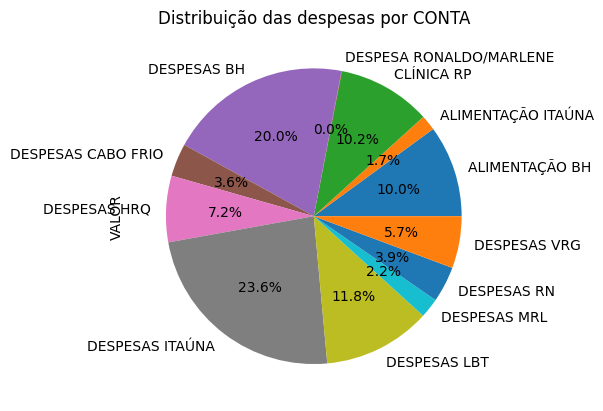

In [20]:
gastos_por_tipo = df.groupby('CONTAS')['VALOR'].sum()

# Criar um gráfico de pizza
gastos_por_tipo.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição das despesas por CONTA')
plt.show()